In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo.lib import DB
from demo import SeedZoneObserver, CoordGenerator
from IPython.display import clear_output

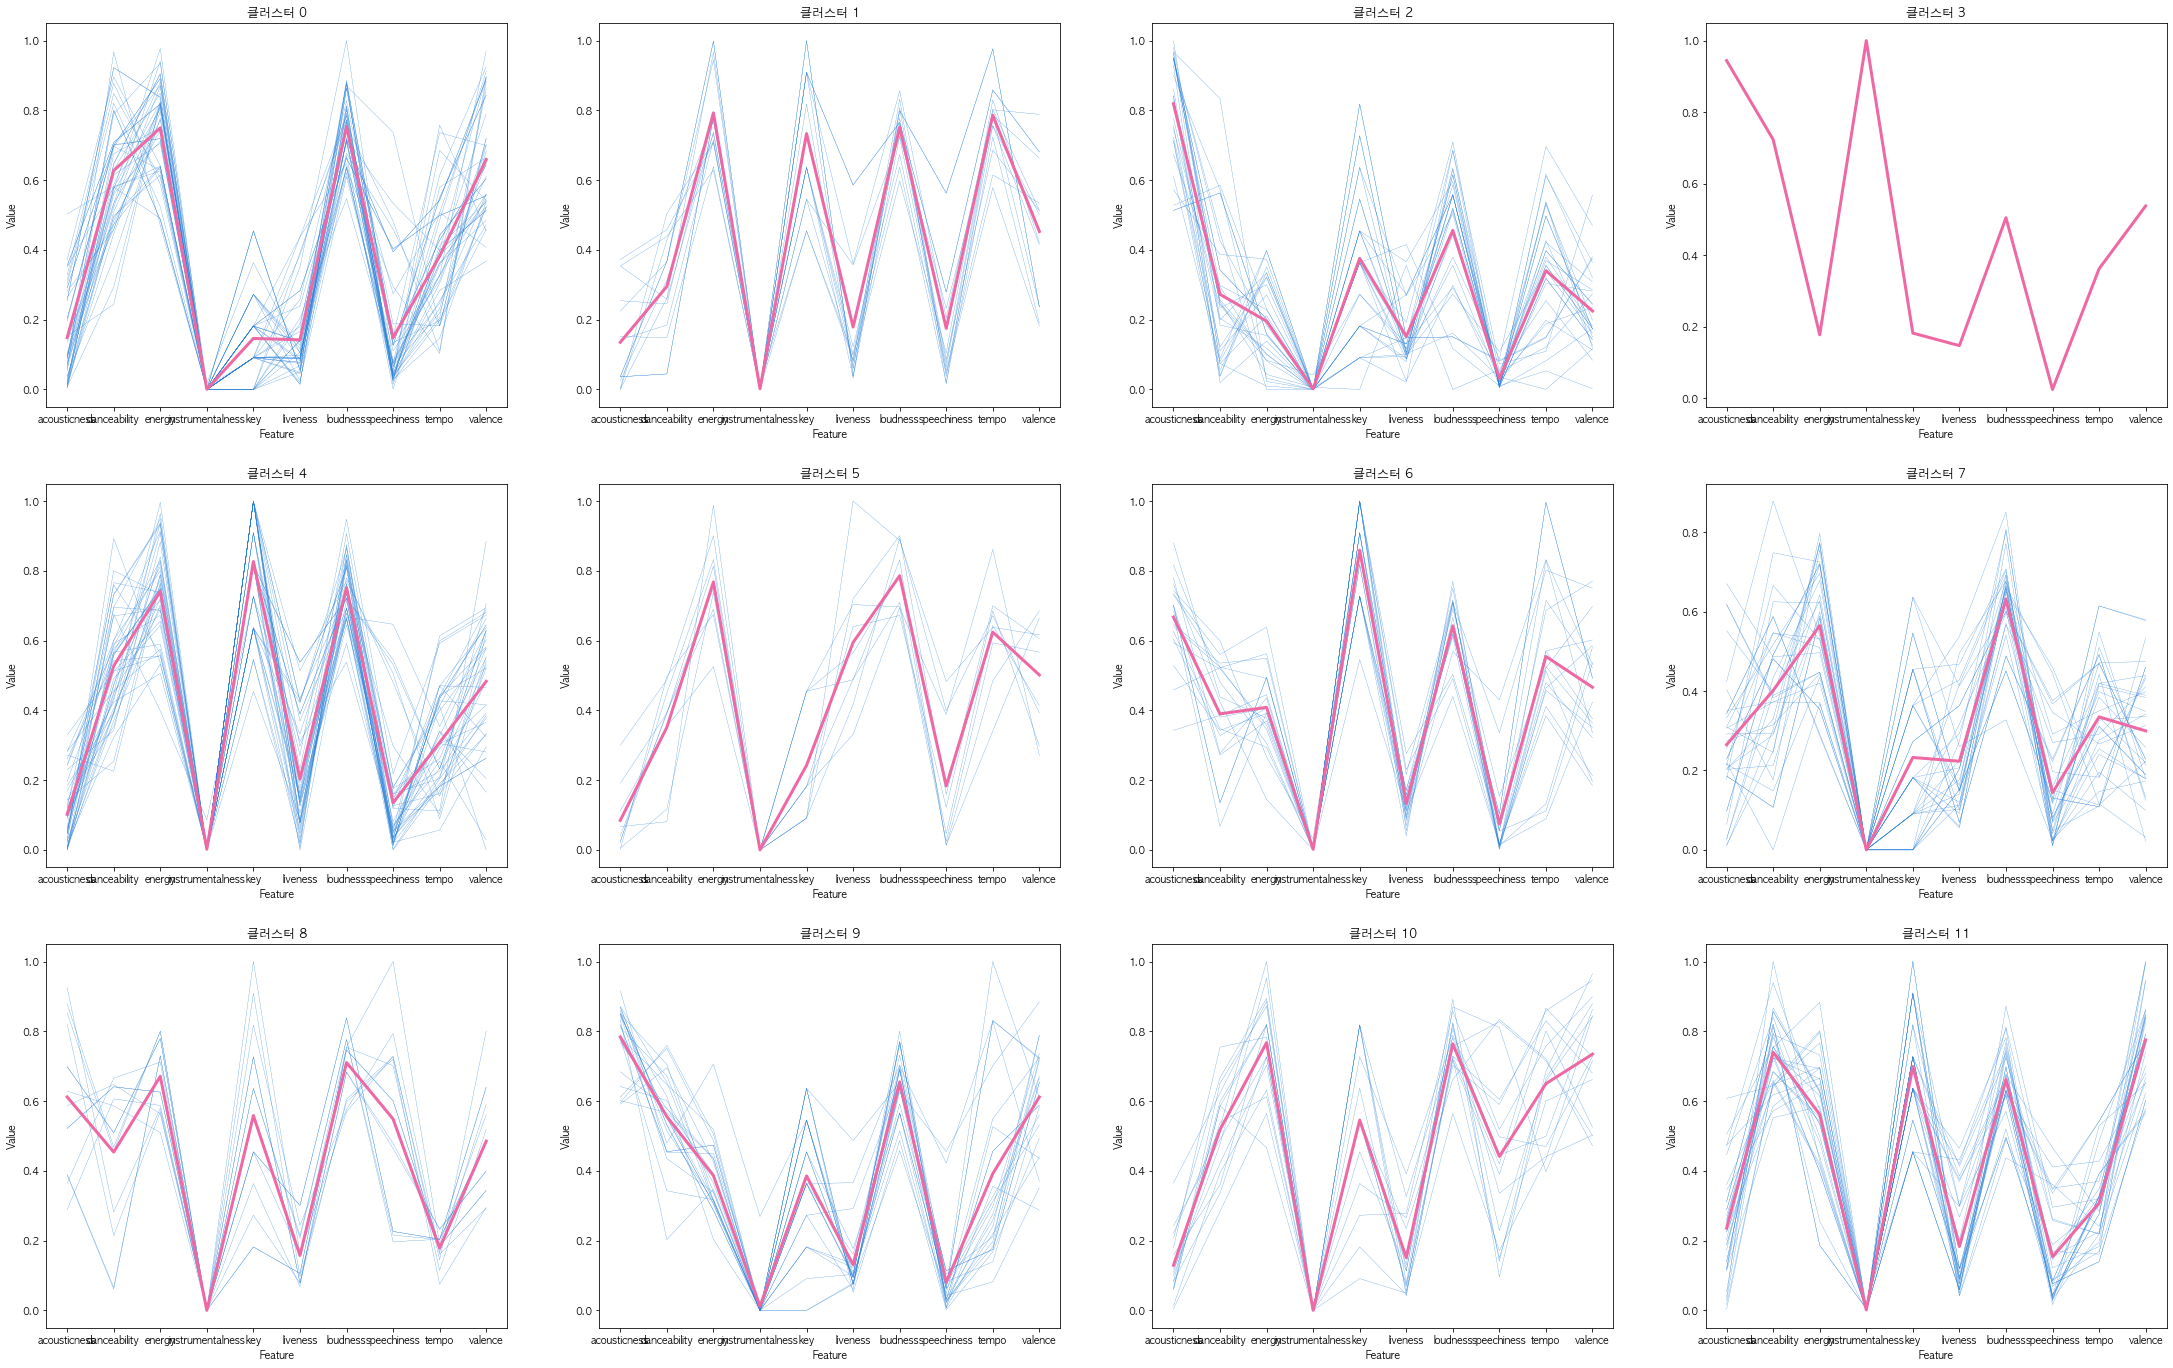

In [5]:
observer = SeedZoneObserver()
observer.run()

clear_output(wait=True)
observer.kmeans.draw_cluster()

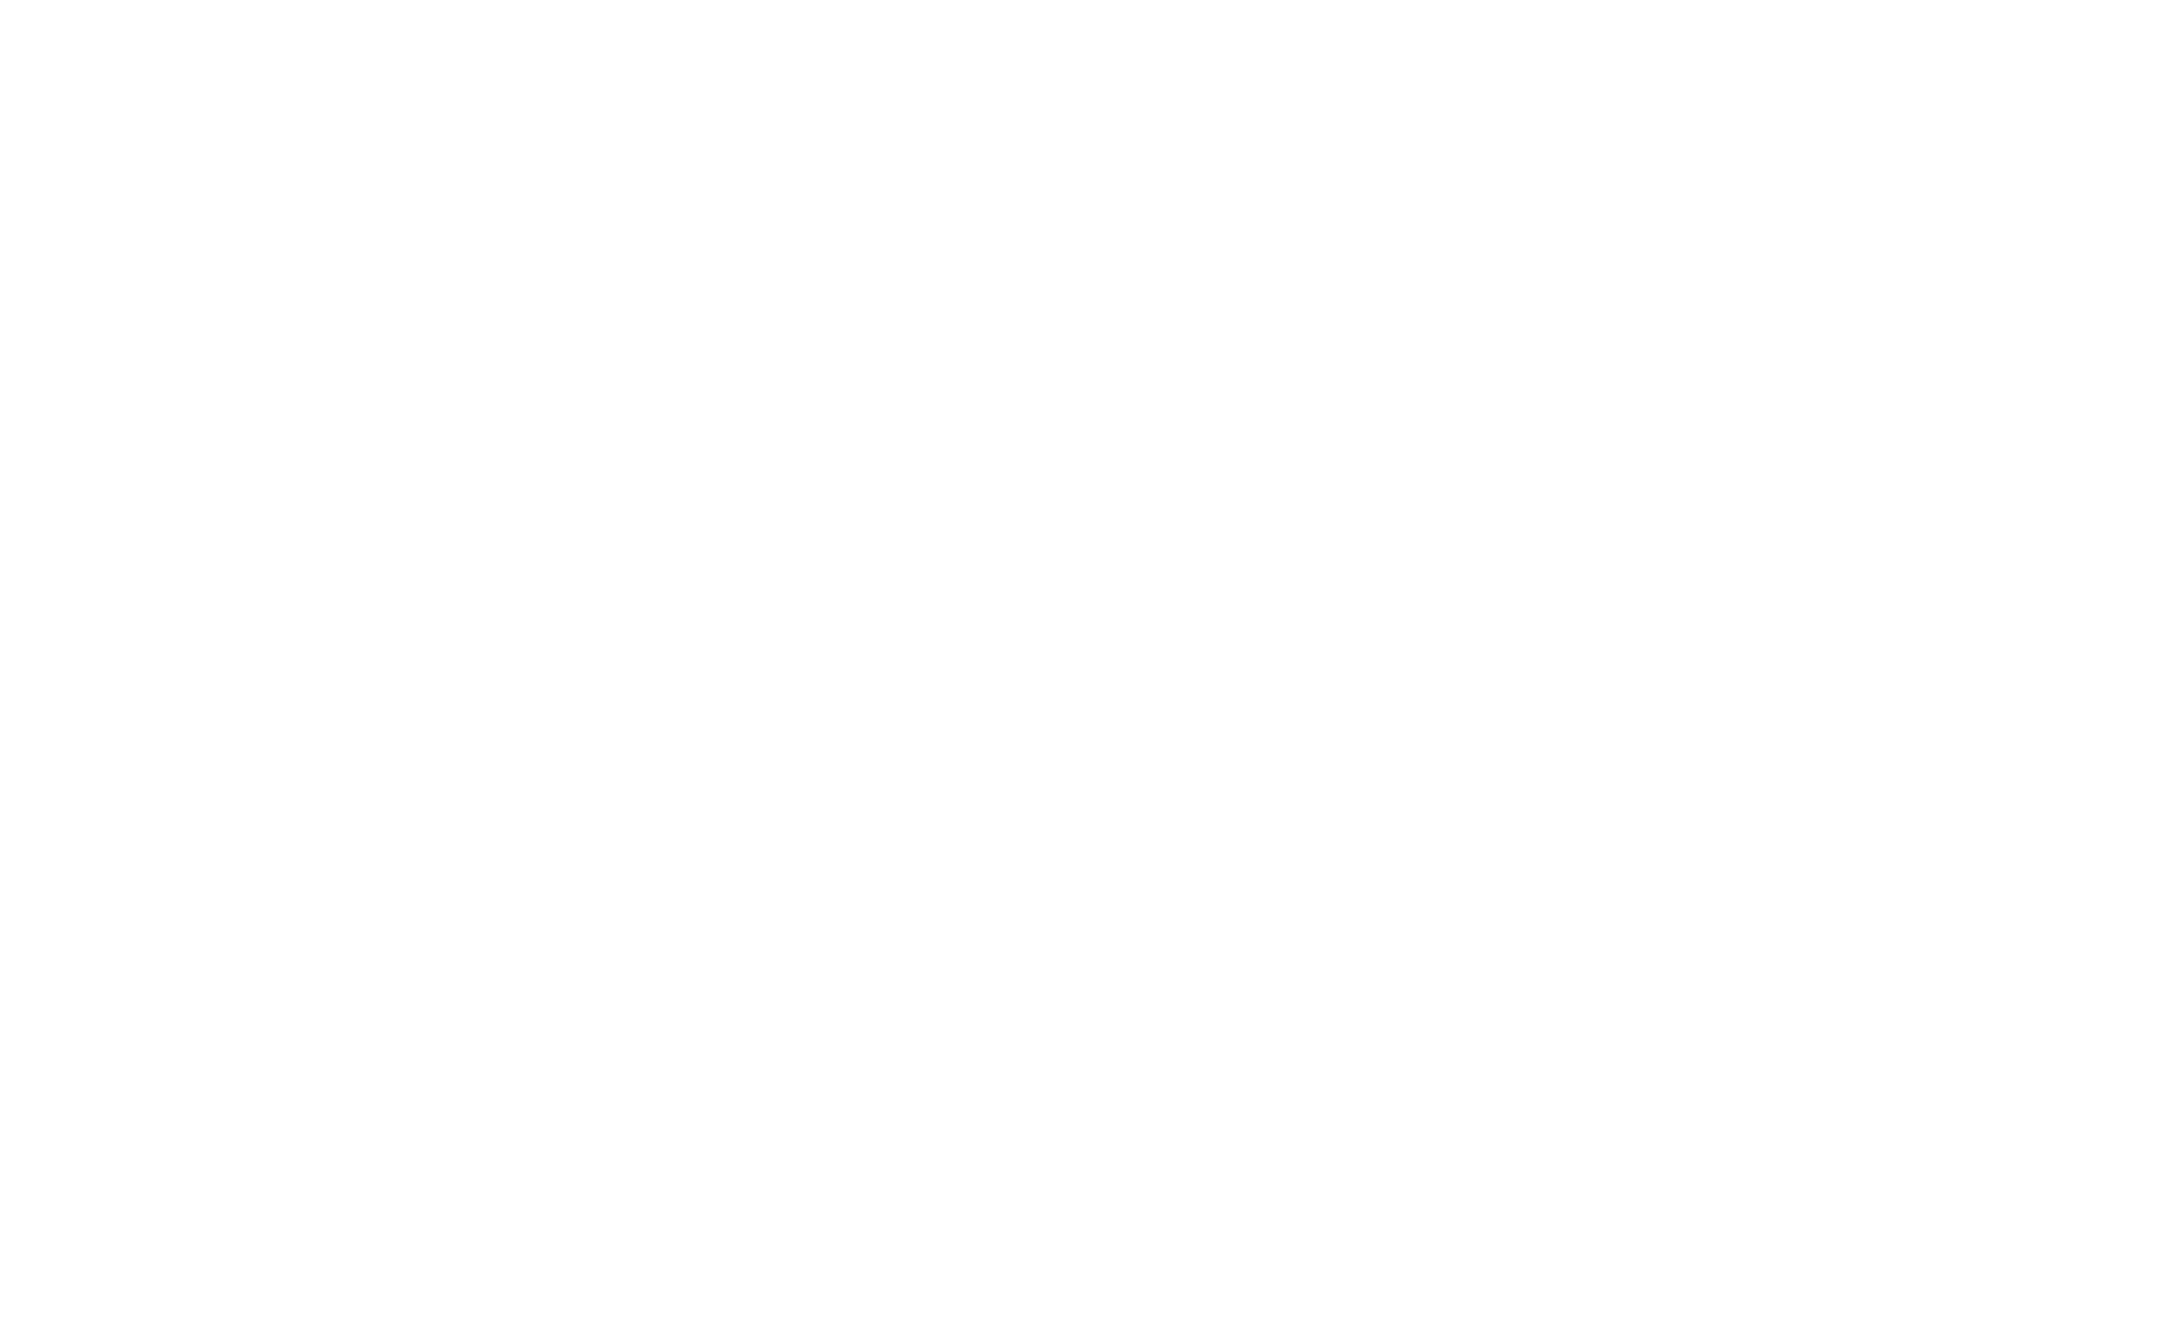

In [6]:
observer.kmeans.save_draw_cluster()

In [7]:
observer.kmeans.sorting()

[ 7.  0. 10. 11.  9.  2.  6.  3.  8.  4.  1.  5.]
sorting okay :)


/var/folders/52/4yvp7r991px0gmq4wyr894j40000gn/T/ipykernel_27527/1805191469.py:27: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, color="white")


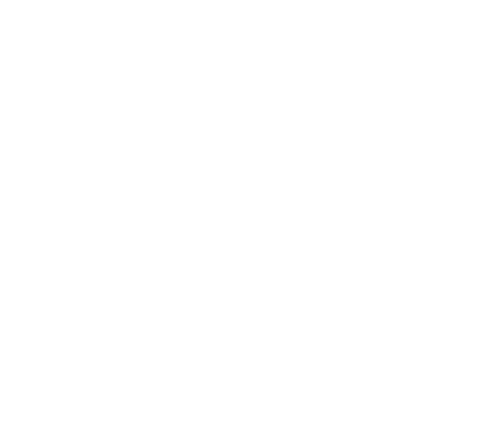

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import pi


# matplotlib.rc("font", weight="bold")
num_labels = observer.kmeans.K
angles = [x/float(num_labels)*(2*pi)
                  for x in range(num_labels)]
angles += angles[:1]

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(8,6))

# Radar : Before Coords
ax = plt.subplot(1,1,1,polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.tick_params(axis='x', which='major', pad=30)
ax.set_rlabel_position(0)

plt.xticks(angles[:-1], ["Cluster {}".format(_) if np.isin(_,[7]) else "" for _ in np.array([7.,  0.,  10., 11.,  9.,  2.,  6.,  3.,  8.,  4.,  1.,  5.,]).astype("int")],
          fontsize=16)

ax.grid(False, color="white")
ax.patch.set_visible(False)
ax.spines["polar"].set_color("white")
ax.spines["polar"].set_lw(1.5)
# ax.set_xticklabels(ax.get_xticks(), {"fontweight": "bold"})
ax.yaxis.set_visible(False)

# ax.yaxis.grid(False)
# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
# ax.xaxis.label.set_fontweight("bold")
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.yaxis.label.set_alpha(0.3)
# ax.yaxis.yticks.set_color("white")
ax.tick_params(axis='y', colors='white')

plt.yticks(range(0, 101, 25), range(0, 101, 25), fontsize=10)
plt.ylim(0, 100)

plt.savefig("./visual_images/polar_1.png", transparent=True)

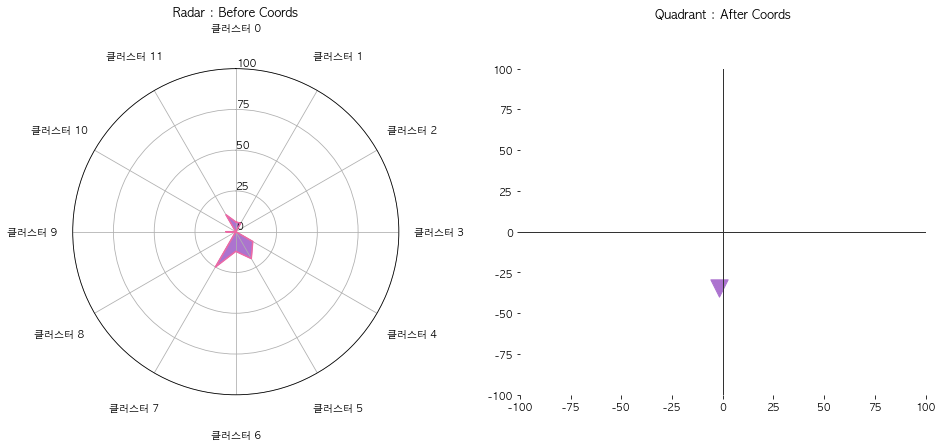

In [104]:
gen = CoordGenerator("62908daac1caa51c93e508fd")

gen.make_coords()
gen.draw_coord()

/Users/formegusto/Desktop/idoformegusto/development/MuLetter/muletter-research/demo/CoordGenerator/draw_coord.py:81: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.patch.set_visible(False)


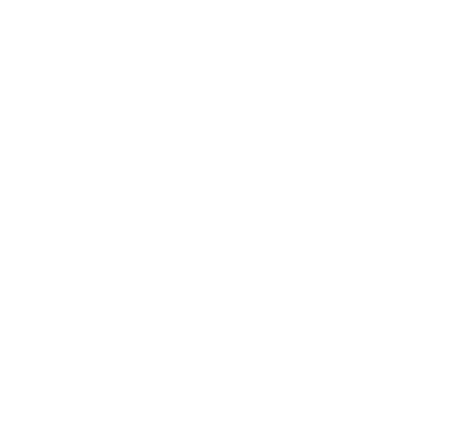

In [114]:
gen = CoordGenerator("62908d70c1caa51c93e508d3")

gen.make_coords()
gen.save_draw_radar()

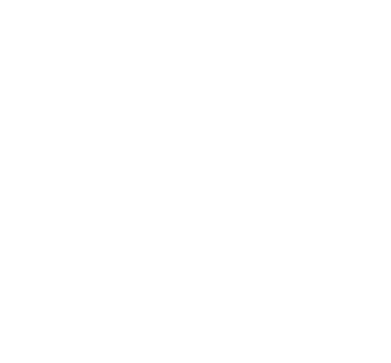

In [121]:
gen = CoordGenerator("62908d70c1caa51c93e508d3")

gen.make_coords()
gen.save_draw_quadrant()

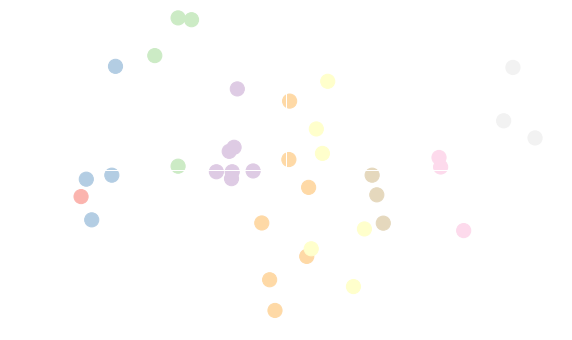

In [152]:
db = DB()
mailboxes = [_ for _ in db.mailbox.find()]

points = np.array([[_['point']['x'], _['point']['y']] for _ in mailboxes])

plt.figure(figsize=(10,6))
ax = plt.subplot(1,1,1)

ax.axvline(0, color="white", linewidth=1)
ax.axhline(0, color="white", linewidth=1)
ax.scatter(points[:, 0], points[:, 1],s=200, c=points[:, 0], cmap="Pastel1")


ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylim(-40, 40)
plt.xlim(-40, 40)

plt.savefig("./visual_images/mailbox_map.png", transparent=True)

In [94]:
result = CoordGenerator.all_make_coords_2()

db = DB()

mailboxes = [_ for _ in db.mailbox.find()]
ran_mailboxes = np.random.choice(np.arange(len(result)), 8)

K = db.cluster_zone.find().sort("version", -1)[0]['K']

In [95]:
ran_mailboxes

array([40,  2, 40,  9, 24, 25,  6, 19])

In [100]:
mailboxes[25]['tracks']

[{'trackId': '47UUNYT0lsDnX9EYHIBf3L',
  'trackName': 'Right Here Right Now',
  'artistIds': '0siBQaURCli5wn2lqv8WZg',
  'artistNames': 'DPR LIVE',
  'image': 'https://i.scdn.co/image/ab67616d0000b273b897243a0505c6efc3b62b44'},
 {'trackId': '6xZ5OhG4AkrMDofArwjQF0',
  'trackName': 'Jacuzzi',
  'artistIds': '61MMiylth1injW39oZBuYB',
  'artistNames': 'San E',
  'image': 'https://i.scdn.co/image/ab67616d0000b27301d35661be70234d5f4a6448'},
 {'trackId': '1j8H6zxSArZDQsbpBCLtgn',
  'trackName': 'Killin me softly (feat. Skinny Brown)',
  'artistIds': '4lgoUoPxqxjZMtN0raCBVK',
  'artistNames': 'YongYong',
  'image': 'https://i.scdn.co/image/ab67616d0000b273157ec6f56c98671e3dc446cc'},
 {'trackId': '0NCStxRS9GPHaioX0RKJJs',
  'trackName': 'Counting Stars (Feat. Beenzino)',
  'artistIds': '5NUVwRESNqYBUTRbiATjy7',
  'artistNames': "BE'O",
  'image': 'https://i.scdn.co/image/ab67616d0000b2731b7df477dc5351d340e8f44e'},
 {'trackId': '3TSLqZssCoCdDlMhCJ08XW',
  'trackName': 'Still Life',
  'artistIds

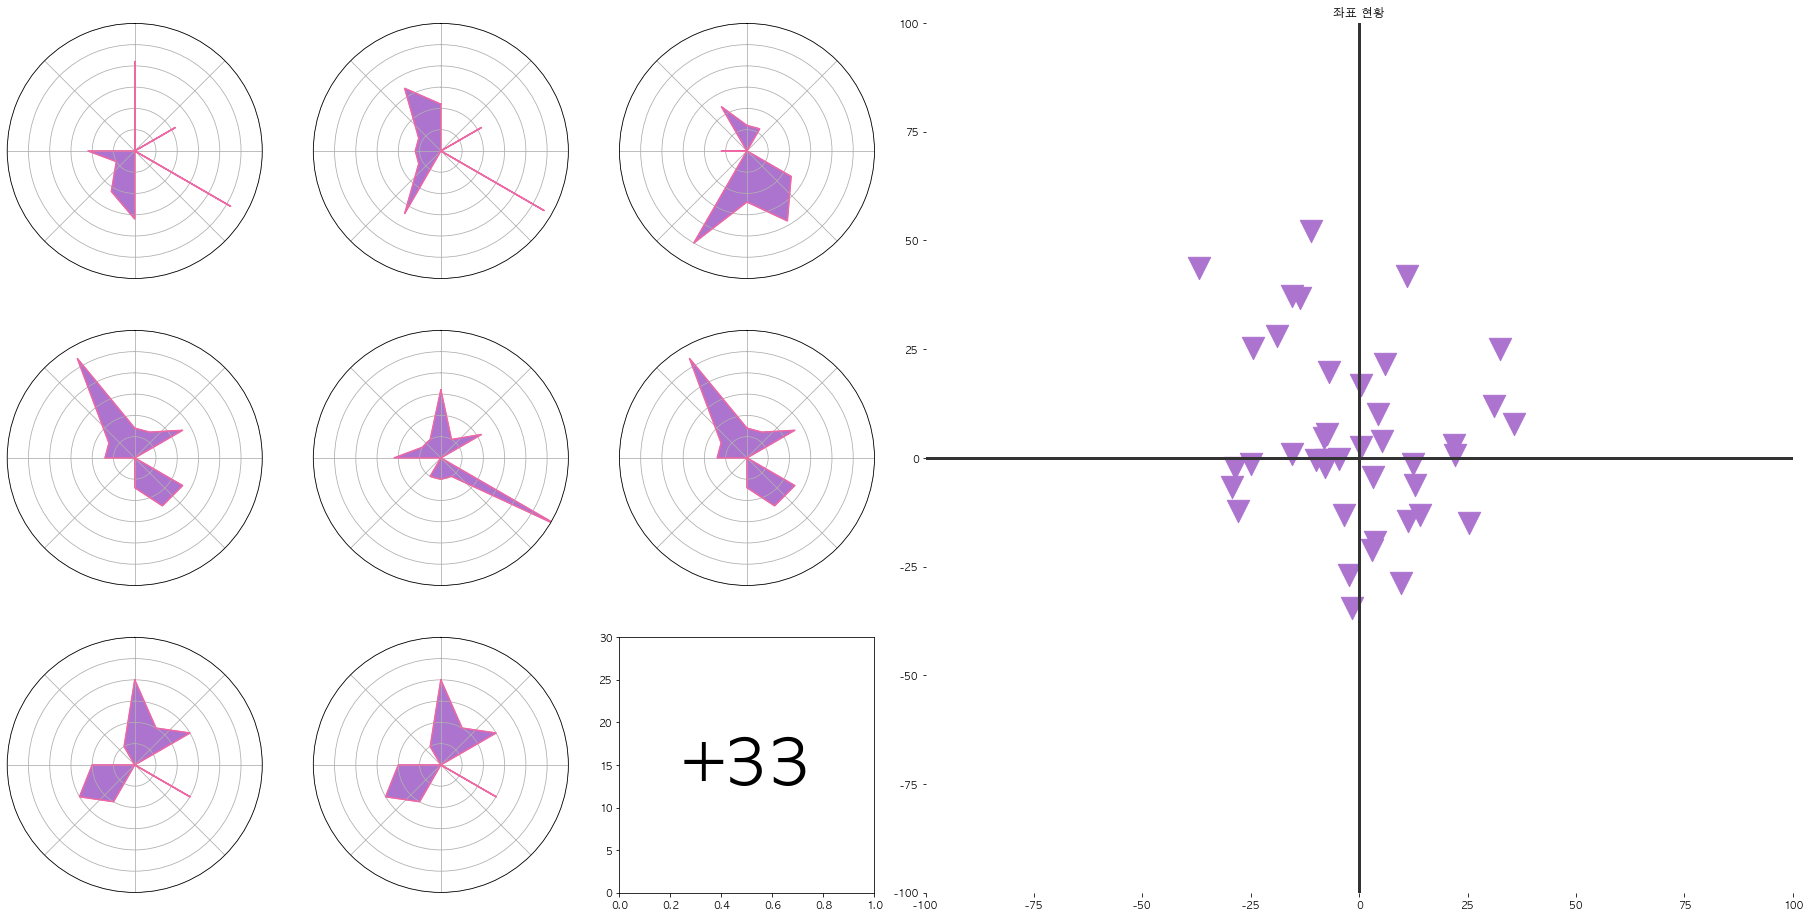

In [96]:
ran_mailboxes = np.random.choice(np.arange(len(result)), 8)

num_labels = K
angles = [x/float(num_labels)*(2*pi)
                  for x in range(num_labels)]
angles += angles[:1]

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(32,16))

for idx,left_idx in enumerate(range(1, 16, 6)):
    for _idx, radar_idx in enumerate(range(left_idx, left_idx + 3)):
        
        if radar_idx == 15:
            ax = plt.subplot(3,6,radar_idx)
            ax.text(0.5, 0.5, "+{}".format(len(mailboxes) - len(ran_mailboxes)),
                   fontsize=64,
                    va='center',
                    ha='center',
                    transform=ax.transAxes
                   )
        else:
            ran_idx = ran_mailboxes[(idx * 3) + _idx]
            ax = plt.subplot(3,6,radar_idx, polar=True)
            ax.set_theta_offset(pi / 2)
            ax.set_theta_direction(-1)
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_rlabel_position(0)
            
            ax.plot(angles, np.append(result[ran_idx][0], result[ran_idx][0][0])  , color="#EE68A4")
            ax.fill(angles, np.append(result[ran_idx][0], result[ran_idx][0][0])  , color="#AC73CF")
            
#         plt.yticks(range(0, 101, 25), range(0, 101, 25), fontsize=10)
        plt.ylim(0, 30)
            


points = np.array([])
for _res in result:
    points = np.append(points,[_res[1]['x'],_res[1]['y']])
points = points.reshape(-1, 2)

gs = fig.add_gridspec(3,6)
ax = fig.add_subplot(gs[:, 3:6])

ax.axvline(0, color="#333", linewidth=3)
ax.axhline(0, color="#333", linewidth=3)

ax.scatter(points[:, 0], points[:, 1], color='#AC73CF', s=500, marker='v')

plt.ylim(-100, 100)
plt.xlim(-100, 100)
    
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("좌표 현황")
        
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from math import pi

num_labels = gen.K
angles = [x/float(num_labels)*(2*pi)
                  for x in range(num_labels)]
angles += angles[:1]
data = np.append(gen.label_percentages_, gen.label_percentages_[0])

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(16,6))

# Radar : Before Coords
ax = plt.subplot(1,2,1,polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.tick_params(axis='x', which='major', pad=30)
ax.set_rlabel_position(0)

ax.plot(angles, data, color="#EE68A4")
ax.fill(angles, data, color='#AC73CF')

plt.xticks(angles[:-1], ["클러스터 {}".format(_) for _ in range(0, gen.K)])
plt.yticks(range(0, 101, 25), range(0, 101, 25), fontsize=10)
plt.ylim(0, 100)
plt.title("Radar : Before Coords")

# Quadrant : After Coords
ax = plt.subplot(1,2,2)
data = gen.point

plt.axvline(0, color="#333", linewidth=1)
plt.axhline(0, color="#333", linewidth=1)

plt.scatter(data['x'], data['y'], color='#AC73CF', s=300, marker='v')

plt.ylim(-100, 100)
plt.xlim(-100, 100)
plt.title("Quadrant : After Coords", pad=50)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()